# LAB 2

In [ ]:
import cv2  # pip install
import numpy as np  # pip install
import glob
import matplotlib.pyplot as plt # pip install
from scipy.spatial import distance as dist  # pip install
import random as rand 

In [ ]:
images = {}
index = {}
for path in glob.glob("./data/*.jpg"):
#     print(path)
    image = cv2.imread(path)
    filename = path.split("\\")[-1]
    images[filename] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hist = cv2.calcHist([image],[0,1,2],None,[8,8,8],[0,256,0,256,0,256])
    hist = cv2.normalize(hist,hist).flatten()
    index[filename] = hist
    print(filename)

hulk.jpg
ironman.jpg
magnetto.jpg
spiderman.jpg
venom.jpg
wolverine.jpg
wonderwoman.jpg
wonderwoman2.jpg


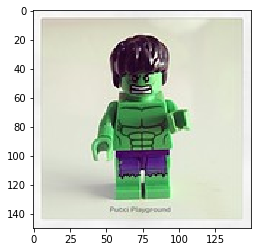

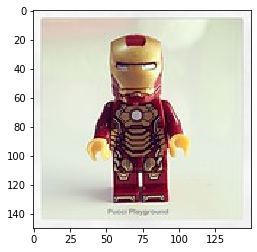

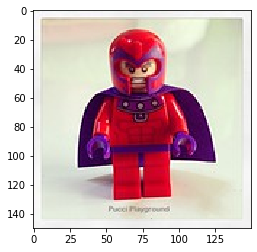

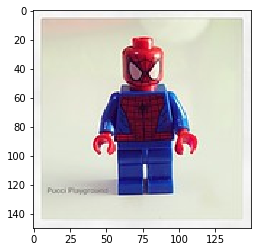

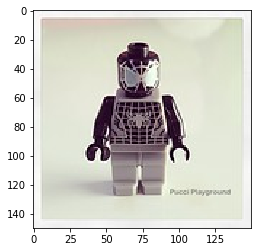

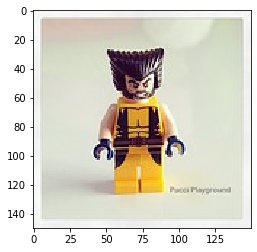

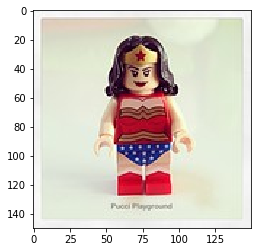

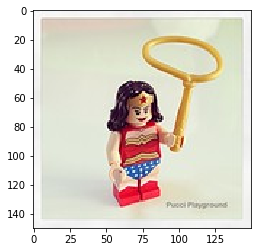

In [ ]:
for k,v in images.items():
    plt.figure()
    plt.imshow(v)

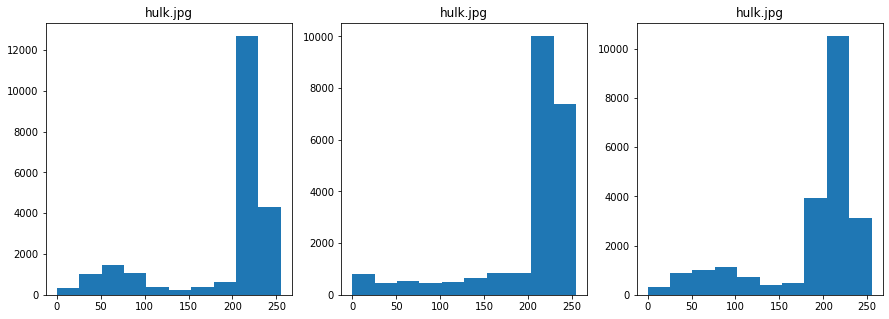

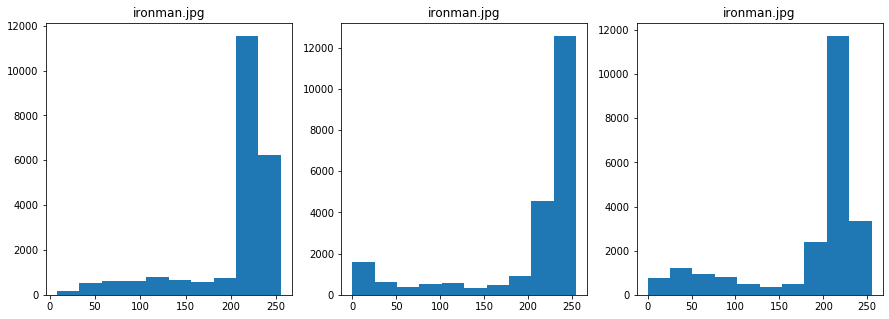

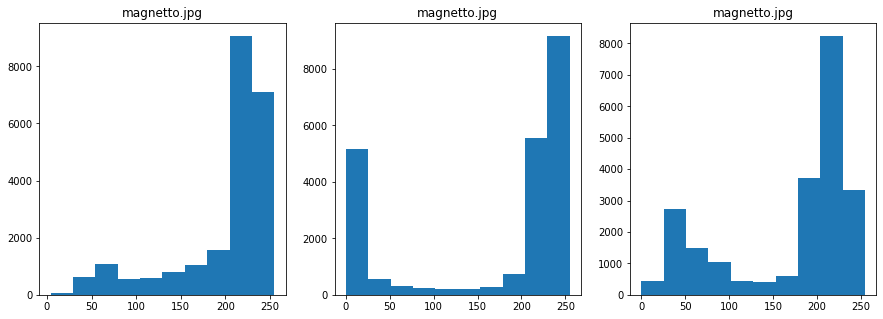

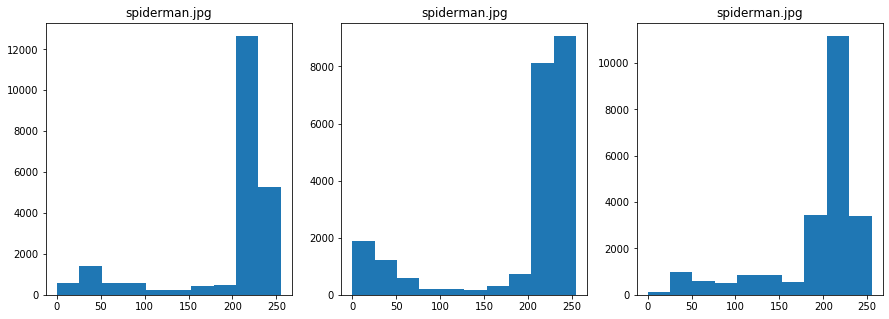

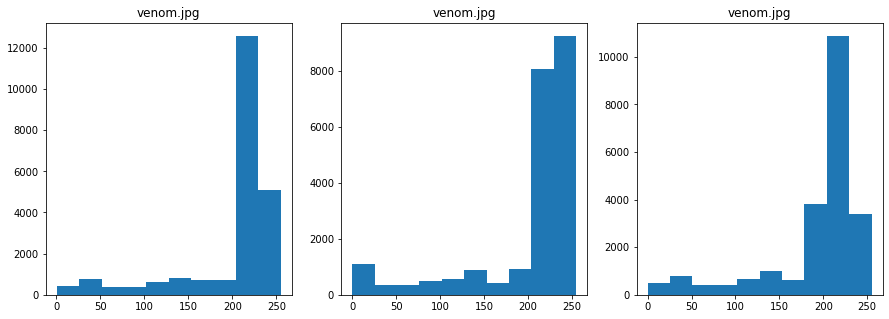

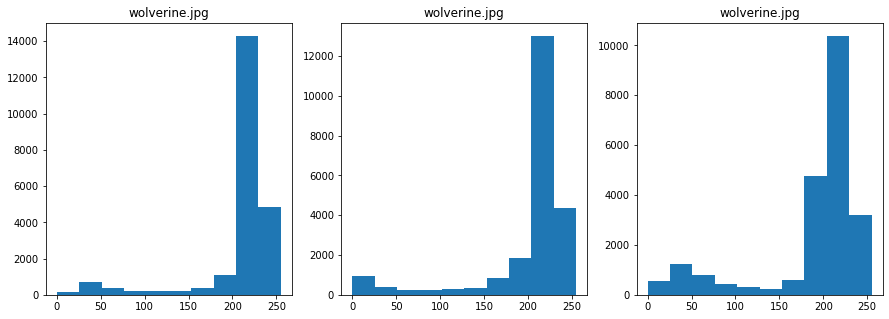

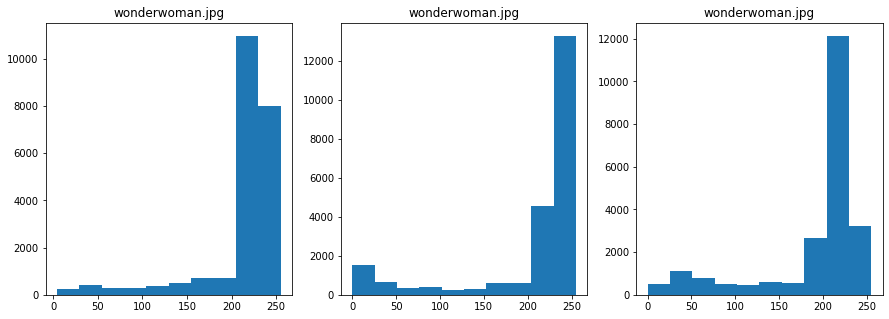

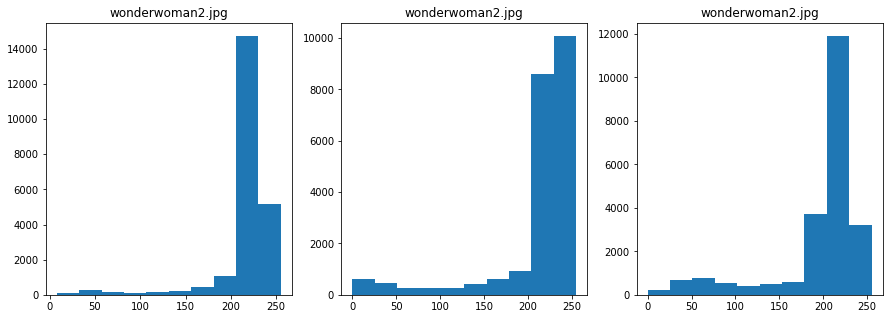

In [ ]:
for k,v in images.items():
    plt.figure(figsize=(15,5))
    ax1 = plt.subplot(1,3,1)
    ax1.set_title(k)
    ax1.hist(v[:,:,0].flatten())
    ax2 = plt.subplot(1,3,2)
    ax2.set_title(k)
    ax2.hist(v[:,:,1].flatten())
    ax3 = plt.subplot(1,3,3)
    ax3.set_title(k)
    ax3.hist(v[:,:,2].flatten())    

Euc <function euclidean at 0x0000021748C8B168>
Taxi <function cityblock at 0x0000021748C8B5E8>


C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


Cheb <function chebyshev at 0x0000021748C8B708>


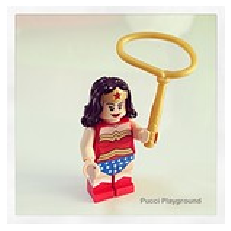

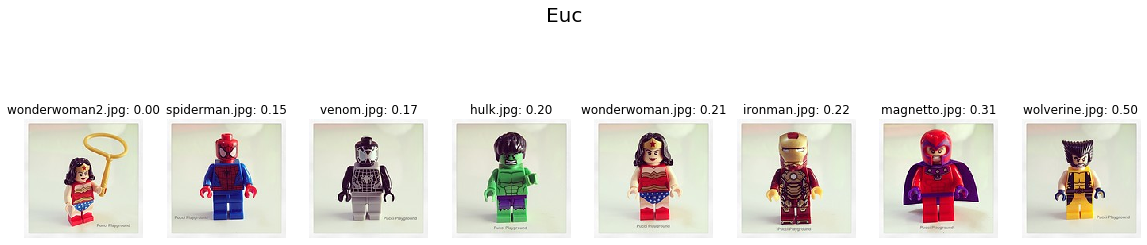

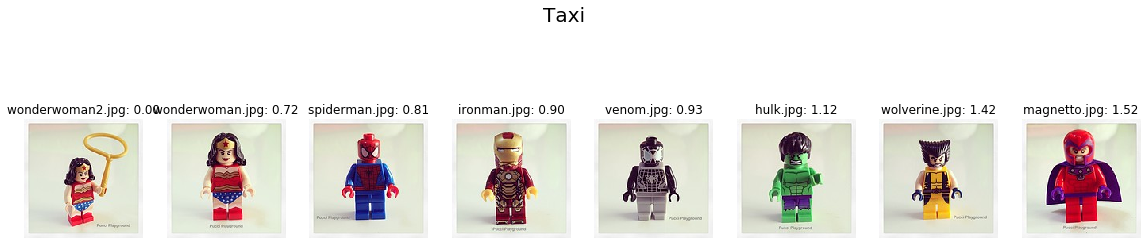

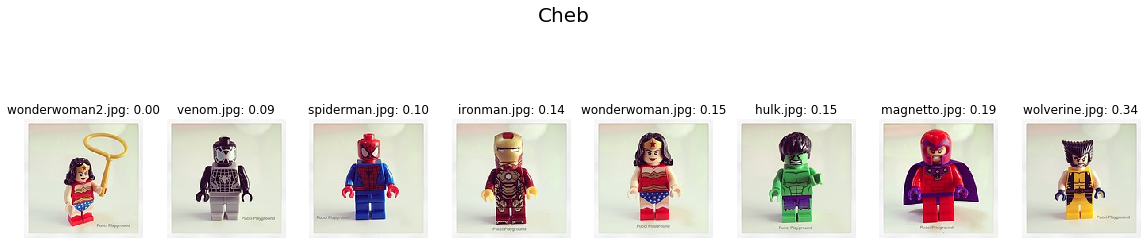

In [ ]:
METRICS = (
    ("Euc",dist.euclidean),
    ("Taxi",dist.cityblock),
    ("Cheb",dist.chebyshev)
)

for name,method in METRICS:
    print(name,method)
    result = {}
    for k,hist in index.items():
        d = method(index["wonderwoman2.jpg"], hist)
        result[k] = d
    result = sorted([(v,k) for k,v in result.items()])
#     print(result)
    figure = plt.figure("Query")
    ax1 = figure.add_subplot(1,1,1)
    ax1.imshow(images["wonderwoman2.jpg"])
    plt.axis("off")
    fig = plt.figure("Results: %s" % (name), figsize=(20,5))
    fig.suptitle(name, fontsize = 20)
    for i,(v,k) in enumerate(result):
        ax = fig.add_subplot(1, len(images),i+1)
        ax.set_title("%s: %.2f" % (k,v))
        plt.imshow(images[k])
        plt.axis("off")
        

# HOMEWORK

![hw.png](attachment:hw.png)

![kmeans.gif](attachment:kmeans.gif)

## Introduction to K-Means Clustering
* Step 1: Choose the number of clusters k. ...
* Step 2: Select k random points from the data as centroids. ...
* Step 3: Assign all the points to the closest cluster centroid. ...
* Step 4: Recompute the centroids of newly formed clusters. ...
* Step 5: Repeat steps 3 and 4.

### Task
* Read 9.1 - KMeans of Bishop book

* Develop the code of the K-means clustering algorithm for Image Segmentation. In Fig.9.3 you can see an example of the final processing result. You should use only the NumPy library. Test your implementation against k = [2,3,10]. Visualize your result. Write a conclusion about the complexity of your implementation and the quality of image compression. Don't use copy-past from the internet, cause it deserves zero marks.


In [ ]:
import numpy as np


class KMeans():
    def __init__(self, k):
        self.k = k #Количество классов
        self.iteration = iteration  #макс итерации
       
    def initialize_centroids(self, X): 
        np.random.RandomState()
        random_idx = np.random.permutation(X.shape[0])
        return X[random_idx[:self.k]]
    
    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.k, X.shape[1]))
        for k in range(self.k):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_find_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.k))
        for k in range(self.k):
            row_norm = np.linalg.norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def closest_cluster(self, distance):
        return np.argmin(distance, axis=1)
    
    def fit(self, X):
        self.X = X
        #Put your code here for 
        # 1.centroid init
        self.centroids = self.initialize_centroids(self.X)
        # 2.iterations through data points and evaluation of centroids' positions
        for i in range(self.iteration):
            old_centroids = self.centroids
            distance = self.compute_find_distance(self.X, old_centroids)
            self.labels = self.closest_cluster(distance)
            self.centroids = self.compute_centroids(self.X, self.labels)
            if np.all(old_centroids == self.centroids):
                break

    def classify(self):
        distance = self.compute_find_distance(self.X, self.centroids)
        centroid_idx = self.closest_cluster(distance)
        new_image = self.X
        
        for i in range(len(new_image)):
            new_image[i] = self.centroids[centroid_idx][i]
            
        return new_image
    

In [ ]:
# Input data
data = [images["hulk.jpg"].reshape((-1,3)) for k in images.keys()]

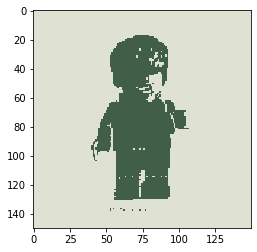

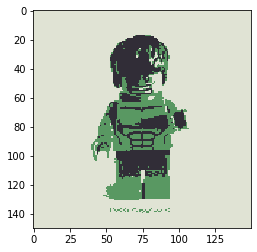

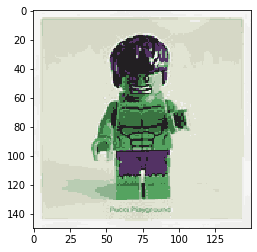

In [ ]:
# Visualize the result image 
# Put your code here
import copy

for k in [2, 3, 10]:
    kmeans = KMeans(k)
    kmeans.fit(copy.deepcopy(data[1]))
    plt.figure()
    plt.imshow(segmented_image)